# DATA 620, Assignment 3

### Group 1 Members:

* Mauricio Alarcon
* Sekhar Mekala 
* Aadi Kalloo
* Srinivasa Illapani
* Param Singh 

### Assignment Description

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.   [For more background information, see also: http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2. Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
3. Python code to create dataset: https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  

Please provide your code and analysis in an IPython notebook stored in your GitHub repository.

You may work in a small group on this project.

Due end of day Monday, 6/26.

In [1]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plot
import matplotlib.colors as colors
%matplotlib inline
plot.rcParams['figure.figsize'] = (21, 14)

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G,women,clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("#Friends, Member")
for w in women:
    print('%d %s' % (W.degree(w),w))

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w,weight='weight'),w))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

In [2]:
women

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Nora Fayette',
 'Helen Lloyd',
 'Dorothy Murchison',
 'Olivia Carleton',
 'Flora Price']

In [3]:
clubs

['E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14']

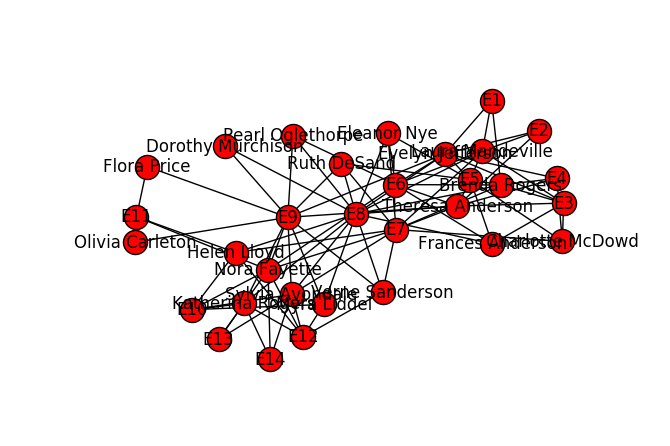

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

pos=nx.spring_layout(G)
nx.draw(G,pos)
labels=nx.draw_networkx_labels(G,pos)
plt.show()


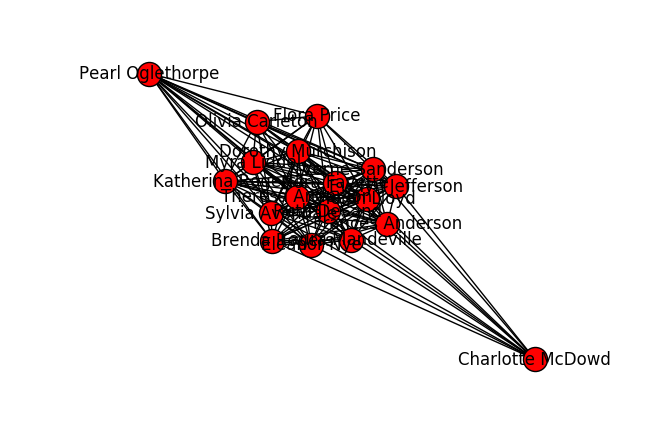

In [5]:
g = bipartite.projected_graph(G, women)
pos=nx.spring_layout(g)
nx.draw(g,pos)
labels=nx.draw_networkx_labels(g,pos)
plt.show()
m = nx.adjacency_matrix(G).todense()

In [6]:
print women
nx.adjacency_matrix(g).todense()

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']


matrix([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1

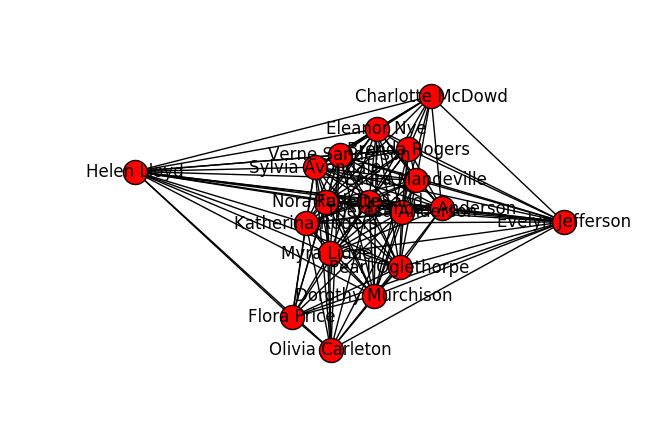

In [7]:
g = bipartite.weighted_projected_graph(G, women)
pos=nx.spring_layout(g)
nx.draw(g,pos)
labels=nx.draw_networkx_labels(g,pos)
plt.show()


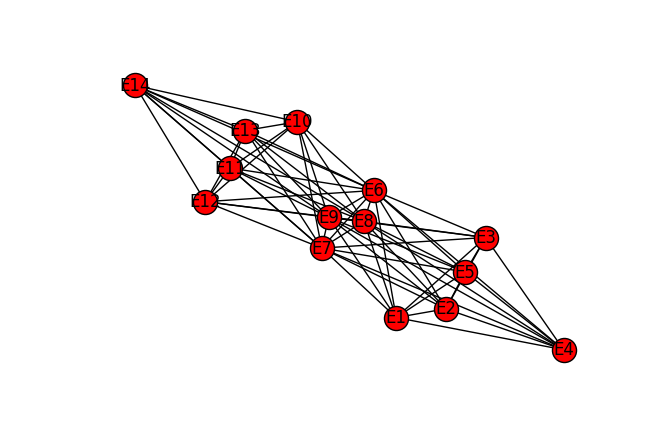

In [8]:
g = bipartite.projected_graph(G, clubs)
pos=nx.spring_layout(g)
nx.draw(g,pos)
labels=nx.draw_networkx_labels(g,pos)
plt.show()

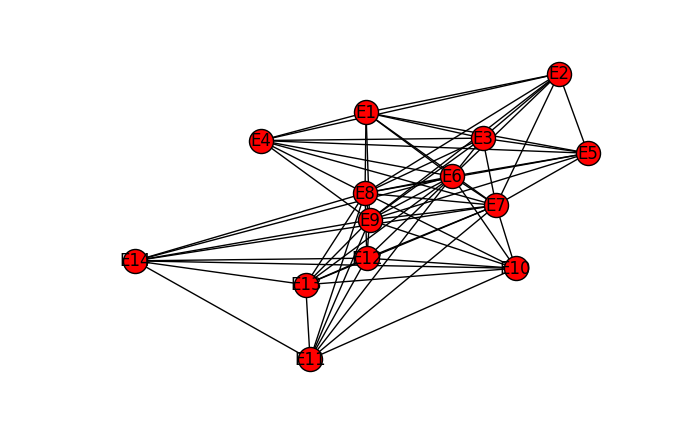

In [9]:
g = bipartite.weighted_projected_graph(G, clubs)
pos=nx.spring_layout(g)
nx.draw(g,pos)
labels=nx.draw_networkx_labels(g,pos)
plt.show()

### Calculate Degrees

In [10]:
degrees = sorted(zip(nx.degree(G).values(), nx.degree(G).keys()))

print '---------------------------'
print "Degrees  |   Node"
print '---------------------------'
for i in range(len(degrees)):
    print '%2d          %s' % (degrees[i][0], degrees[i][1])

---------------------------
Degrees  |   Node
---------------------------
 2          Dorothy Murchison
 2          Flora Price
 2          Olivia Carleton
 3          E1
 3          E13
 3          E14
 3          E2
 3          Pearl Oglethorpe
 4          Charlotte McDowd
 4          E11
 4          E4
 4          Eleanor Nye
 4          Frances Anderson
 4          Myra Liddel
 4          Ruth DeSand
 4          Verne Sanderson
 5          E10
 5          Helen Lloyd
 6          E12
 6          E3
 6          Katherina Rogers
 7          Brenda Rogers
 7          Laura Mandeville
 7          Sylvia Avondale
 8          E5
 8          E6
 8          Evelyn Jefferson
 8          Nora Fayette
 8          Theresa Anderson
10          E7
12          E9
14          E8


### Plotting Bipartite Network

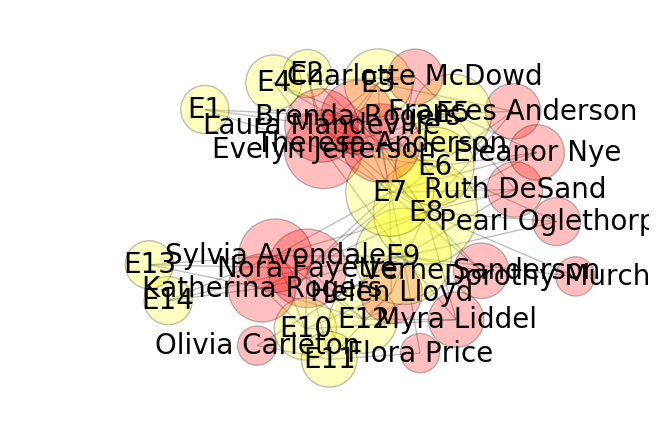

In [11]:
colors=[]
for n_element in G.degree().keys():
    if n_element in G.degree(women).keys():
        colors.append('red')
    else:
        colors.append('yellow')
        
d = G.degree()
nx.draw(G, node_size=[v*400 for v in d.values()], with_labels=True, node_color=colors, alpha=.25, font_size=20)

### Degree Centrality

In [12]:
W = nx.bipartite.weighted_projected_graph(G, women)

wdegrees = sorted(zip(W.degree(women).values(), W.degree(women).keys()))

print '---------------------------'
print "Degrees  | Member"
print '---------------------------'
for i in range(len(wdegrees)):
    print '%d        %s' % (wdegrees[i][0], wdegrees[i][1])

---------------------------
Degrees  | Member
---------------------------
11        Charlotte McDowd
12        Flora Price
12        Olivia Carleton
15        Brenda Rogers
15        Eleanor Nye
15        Frances Anderson
15        Laura Mandeville
16        Dorothy Murchison
16        Katherina Rogers
16        Myra Liddel
16        Pearl Oglethorpe
17        Evelyn Jefferson
17        Helen Lloyd
17        Nora Fayette
17        Ruth DeSand
17        Sylvia Avondale
17        Theresa Anderson
17        Verne Sanderson


#### Bipartite Projection

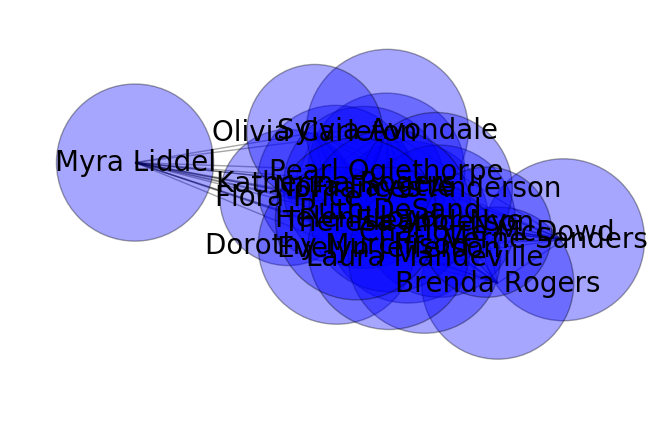

In [13]:
d = nx.degree(W)
nx.draw(W, node_size=[v*800 for v in d.values()], with_labels=True, node_color='b', alpha=.35, font_size=20)

### Betweenness Centrality

In [14]:
bet_cen = nx.betweenness_centrality(W)
bet_cen = sorted(zip(bet_cen.values(), bet_cen.keys()), reverse=True)

print ''
print "Betweenness"
print "Centrality    Member"
print '-------------------------------'
for i in range(len(bet_cen)):
    print ' %f     %s' % (bet_cen[i][0], bet_cen[i][1])


Betweenness
Centrality    Member
-------------------------------
 0.010122     Verne Sanderson
 0.010122     Theresa Anderson
 0.010122     Sylvia Avondale
 0.010122     Ruth DeSand
 0.010122     Nora Fayette
 0.010122     Helen Lloyd
 0.010122     Evelyn Jefferson
 0.005348     Pearl Oglethorpe
 0.005348     Myra Liddel
 0.005348     Katherina Rogers
 0.005348     Dorothy Murchison
 0.002674     Laura Mandeville
 0.002674     Frances Anderson
 0.002674     Eleanor Nye
 0.002674     Brenda Rogers
 0.000000     Olivia Carleton
 0.000000     Flora Price
 0.000000     Charlotte McDowd


### Closeness centrality

In [15]:
clo_cen = nx.closeness_centrality(W)
clo_cen = sorted(zip(clo_cen.values(), clo_cen.keys()), reverse=True)

print ''
print "Closeness"
print "Centrality    Member"
print '-------------------------------'
for i in range(len(clo_cen)):
    print ' %f     %s' % (clo_cen[i][0], clo_cen[i][1])


Closeness
Centrality    Member
-------------------------------
 1.000000     Verne Sanderson
 1.000000     Theresa Anderson
 1.000000     Sylvia Avondale
 1.000000     Ruth DeSand
 1.000000     Nora Fayette
 1.000000     Helen Lloyd
 1.000000     Evelyn Jefferson
 0.944444     Pearl Oglethorpe
 0.944444     Myra Liddel
 0.944444     Katherina Rogers
 0.944444     Dorothy Murchison
 0.894737     Laura Mandeville
 0.894737     Frances Anderson
 0.894737     Eleanor Nye
 0.894737     Brenda Rogers
 0.772727     Olivia Carleton
 0.772727     Flora Price
 0.739130     Charlotte McDowd


### Triangle Analysis

In [16]:
tri = nx.triangles(W)
tri = sorted(zip(tri.values(), tri.keys()), reverse=True)

print ''
print "Triangles    Member"
print '-------------------------------'
for i in range(len(tri)):
    print ' %3d         %s' % (tri[i][0], tri[i][1])


Triangles    Member
-------------------------------
 122         Verne Sanderson
 122         Theresa Anderson
 122         Sylvia Avondale
 122         Ruth DeSand
 122         Nora Fayette
 122         Helen Lloyd
 122         Evelyn Jefferson
 112         Pearl Oglethorpe
 112         Myra Liddel
 112         Katherina Rogers
 112         Dorothy Murchison
 101         Laura Mandeville
 101         Frances Anderson
 101         Eleanor Nye
 101         Brenda Rogers
  66         Olivia Carleton
  66         Flora Price
  55         Charlotte McDowd
